<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/BuildingClusteringModels2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries
First, import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualizations
sns.set(style="whitegrid")


Step 2: Load and Prepare the Data
Load your dataset and preprocess it if necessary.

In [2]:
# Load your data
# For this example, we will generate synthetic data
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Step 3: KMeans Clustering
Create and fit a KMeans clustering model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Silhouette Score: 0.6569234398199433


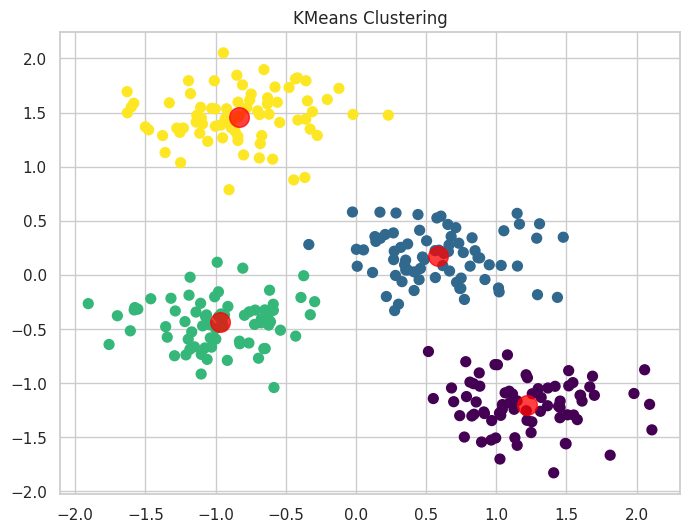

In [3]:
# Define the model
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model
kmeans.fit(X_scaled)

# Predict the cluster labels
kmeans_labels = kmeans.predict(X_scaled)

# Evaluate the model using silhouette score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette}')

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('KMeans Clustering')
plt.show()


Step 4: DBSCAN Clustering
Create and fit a DBSCAN clustering model.

DBSCAN Silhouette Score: 0.5942168218296967


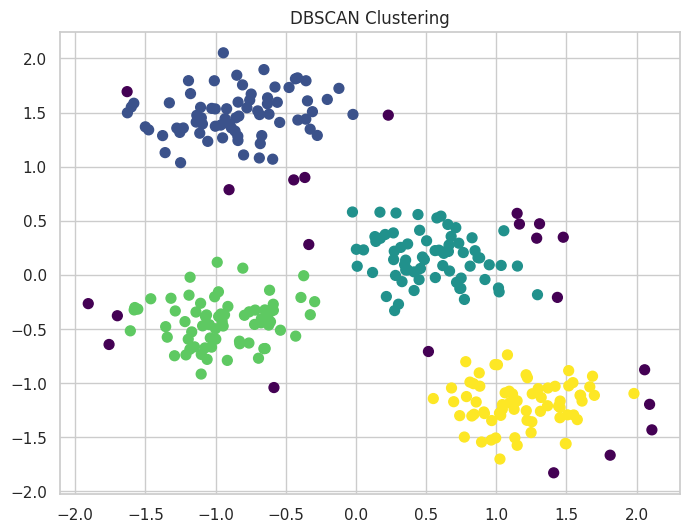

In [4]:
# Define the model
dbscan = DBSCAN(eps=0.3, min_samples=10)

# Fit the model
dbscan_labels = dbscan.fit_predict(X_scaled)

# Evaluate the model using silhouette score (excluding noise points)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
else:
    print('DBSCAN Silhouette Score: Undefined (only one cluster found)')

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


Step 5: Hyperparameter Tuning (Optional)
Use GridSearchCV to find the best parameters for the clustering algorithms.

KMeans Hyperparameter Tuning

In [5]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 600, 900]
}

# Create the GridSearchCV object
kmeans = KMeans()
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_scaled)

# Print the best parameters and number of clusters
print("Best parameters found: ", grid_search.best_params_)
print("Best number of clusters: ", grid_search.best_params_['n_clusters'])


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters found:  {'init': 'random', 'max_iter': 600, 'n_clusters': 6, 'n_init': 10}
Best number of clusters:  6


DBSCAN Hyperparameter Tuning

In [6]:
from sklearn.metrics import make_scorer

# Custom scorer that uses silhouette score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    # If only one cluster is found, silhouette score is not defined, so return -1
    if len(set(labels)) == 1:
        return -1
    return silhouette_score(X, labels)

# Set the parameter grid
param_grid = {
    'eps': [0.2, 0.3, 0.4, 0.5],
    'min_samples': [5, 10, 15]
}

# Instantiate DBSCAN and GridSearchCV
dbscan = DBSCAN()
grid_search = GridSearchCV(dbscan, param_grid, scoring=make_scorer(silhouette_scorer), cv=3, verbose=3, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_scaled)

# Print the best parameters and number of clusters
best_params = grid_search.best_params_
best_dbscan = DBSCAN(**best_params).fit(X_scaled)
labels = best_dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Best parameters found: {best_params}')
print(f'Number of clusters: {n_clusters}')
print(f'Noisy points: {n_noise}')


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found: {'eps': 0.2, 'min_samples': 5}
Number of clusters: 7
Noisy points: 37


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Step 6: Conclusion
The above steps demonstrate how to build, fit, evaluate, and tune clustering models using scikit-learn. Adjust the parameters and methods according to your specific dataset and requirements for optimal results.






